In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True)

In [2]:
# Load the data

data = load_breast_cancer()
X, Y = data.data, data.target

# Reshape the data

X = X.reshape(-1, X.shape[1])
Y = Y.reshape(-1, 1)

In [3]:
# Split the data into two halves training and testing
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size=0.33)

# Preprocess the data by scaling the data
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

In [4]:
D = data.data.shape[1] # Represent the number of feature

# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)


# Define the loss and optimizer for the model
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [5]:
# Convert each numpy to torch tensors
inputs_train = torch.from_numpy(Xtrain.astype(np.float32))
targets_train = torch.from_numpy(Ytrain.astype(np.float32))

inputs_val = torch.from_numpy(Xval.astype(np.float32))
targets_val = torch.from_numpy(Yval.astype(np.float32))

# Train the model
epochs = 1000
trainlosses = []
vallosses = []

trainacc = []
valacc = []

for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    # Forward pass
    outputs_train = model(inputs_train)
    loss_train = criterion(outputs_train, targets_train)
    
    trainacc.append(np.mean(Ytrain == np.round(outputs_train.detach().numpy())))
    
    # Track the loss
    trainlosses.append(loss_train)
    
    # Backward pass and Optimize the model
    loss_train.backward()
    optimizer.step()
    
    
    # Compute validation losses 
    outputs_val = model(inputs_val)
    loss_val = criterion(outputs_val, targets_val)
    vallosses.append(loss_val)
    
    valacc.append(np.mean(Yval == np.round(outputs_val.detach().numpy())))
    
    print("Epoch : {}/{}, Train-Loss : {:.4f}, Val-Loss : {:.4f}".format(epoch + 1, epochs, loss_train.item(), loss_val.item()))


Epoch : 1/1000, Train-Loss : 0.5214, Val-Loss : 0.5113
Epoch : 2/1000, Train-Loss : 0.5166, Val-Loss : 0.5070
Epoch : 3/1000, Train-Loss : 0.5119, Val-Loss : 0.5027
Epoch : 4/1000, Train-Loss : 0.5072, Val-Loss : 0.4985
Epoch : 5/1000, Train-Loss : 0.5026, Val-Loss : 0.4943
Epoch : 6/1000, Train-Loss : 0.4981, Val-Loss : 0.4902
Epoch : 7/1000, Train-Loss : 0.4936, Val-Loss : 0.4861
Epoch : 8/1000, Train-Loss : 0.4892, Val-Loss : 0.4821
Epoch : 9/1000, Train-Loss : 0.4848, Val-Loss : 0.4781
Epoch : 10/1000, Train-Loss : 0.4805, Val-Loss : 0.4742
Epoch : 11/1000, Train-Loss : 0.4763, Val-Loss : 0.4704
Epoch : 12/1000, Train-Loss : 0.4721, Val-Loss : 0.4666
Epoch : 13/1000, Train-Loss : 0.4680, Val-Loss : 0.4629
Epoch : 14/1000, Train-Loss : 0.4639, Val-Loss : 0.4593
Epoch : 15/1000, Train-Loss : 0.4599, Val-Loss : 0.4557
Epoch : 16/1000, Train-Loss : 0.4560, Val-Loss : 0.4522
Epoch : 17/1000, Train-Loss : 0.4521, Val-Loss : 0.4487
Epoch : 18/1000, Train-Loss : 0.4483, Val-Loss : 0.4453
E

Epoch : 224/1000, Train-Loss : 0.1777, Val-Loss : 0.2070
Epoch : 225/1000, Train-Loss : 0.1773, Val-Loss : 0.2066
Epoch : 226/1000, Train-Loss : 0.1768, Val-Loss : 0.2062
Epoch : 227/1000, Train-Loss : 0.1764, Val-Loss : 0.2058
Epoch : 228/1000, Train-Loss : 0.1760, Val-Loss : 0.2054
Epoch : 229/1000, Train-Loss : 0.1755, Val-Loss : 0.2050
Epoch : 230/1000, Train-Loss : 0.1751, Val-Loss : 0.2046
Epoch : 231/1000, Train-Loss : 0.1747, Val-Loss : 0.2042
Epoch : 232/1000, Train-Loss : 0.1743, Val-Loss : 0.2038
Epoch : 233/1000, Train-Loss : 0.1739, Val-Loss : 0.2034
Epoch : 234/1000, Train-Loss : 0.1735, Val-Loss : 0.2030
Epoch : 235/1000, Train-Loss : 0.1730, Val-Loss : 0.2026
Epoch : 236/1000, Train-Loss : 0.1726, Val-Loss : 0.2023
Epoch : 237/1000, Train-Loss : 0.1722, Val-Loss : 0.2019
Epoch : 238/1000, Train-Loss : 0.1718, Val-Loss : 0.2015
Epoch : 239/1000, Train-Loss : 0.1714, Val-Loss : 0.2011
Epoch : 240/1000, Train-Loss : 0.1710, Val-Loss : 0.2008
Epoch : 241/1000, Train-Loss : 

Epoch : 438/1000, Train-Loss : 0.1222, Val-Loss : 0.1538
Epoch : 439/1000, Train-Loss : 0.1220, Val-Loss : 0.1537
Epoch : 440/1000, Train-Loss : 0.1219, Val-Loss : 0.1535
Epoch : 441/1000, Train-Loss : 0.1217, Val-Loss : 0.1534
Epoch : 442/1000, Train-Loss : 0.1216, Val-Loss : 0.1532
Epoch : 443/1000, Train-Loss : 0.1214, Val-Loss : 0.1531
Epoch : 444/1000, Train-Loss : 0.1213, Val-Loss : 0.1529
Epoch : 445/1000, Train-Loss : 0.1211, Val-Loss : 0.1527
Epoch : 446/1000, Train-Loss : 0.1210, Val-Loss : 0.1526
Epoch : 447/1000, Train-Loss : 0.1208, Val-Loss : 0.1524
Epoch : 448/1000, Train-Loss : 0.1207, Val-Loss : 0.1523
Epoch : 449/1000, Train-Loss : 0.1205, Val-Loss : 0.1521
Epoch : 450/1000, Train-Loss : 0.1204, Val-Loss : 0.1520
Epoch : 451/1000, Train-Loss : 0.1202, Val-Loss : 0.1519
Epoch : 452/1000, Train-Loss : 0.1201, Val-Loss : 0.1517
Epoch : 453/1000, Train-Loss : 0.1199, Val-Loss : 0.1516
Epoch : 454/1000, Train-Loss : 0.1198, Val-Loss : 0.1514
Epoch : 455/1000, Train-Loss : 

Epoch : 670/1000, Train-Loss : 0.0971, Val-Loss : 0.1278
Epoch : 671/1000, Train-Loss : 0.0970, Val-Loss : 0.1277
Epoch : 672/1000, Train-Loss : 0.0970, Val-Loss : 0.1276
Epoch : 673/1000, Train-Loss : 0.0969, Val-Loss : 0.1276
Epoch : 674/1000, Train-Loss : 0.0968, Val-Loss : 0.1275
Epoch : 675/1000, Train-Loss : 0.0967, Val-Loss : 0.1274
Epoch : 676/1000, Train-Loss : 0.0967, Val-Loss : 0.1273
Epoch : 677/1000, Train-Loss : 0.0966, Val-Loss : 0.1272
Epoch : 678/1000, Train-Loss : 0.0965, Val-Loss : 0.1272
Epoch : 679/1000, Train-Loss : 0.0964, Val-Loss : 0.1271
Epoch : 680/1000, Train-Loss : 0.0964, Val-Loss : 0.1270
Epoch : 681/1000, Train-Loss : 0.0963, Val-Loss : 0.1269
Epoch : 682/1000, Train-Loss : 0.0962, Val-Loss : 0.1268
Epoch : 683/1000, Train-Loss : 0.0961, Val-Loss : 0.1268
Epoch : 684/1000, Train-Loss : 0.0961, Val-Loss : 0.1267
Epoch : 685/1000, Train-Loss : 0.0960, Val-Loss : 0.1266
Epoch : 686/1000, Train-Loss : 0.0959, Val-Loss : 0.1265
Epoch : 687/1000, Train-Loss : 

Epoch : 912/1000, Train-Loss : 0.0829, Val-Loss : 0.1121
Epoch : 913/1000, Train-Loss : 0.0829, Val-Loss : 0.1121
Epoch : 914/1000, Train-Loss : 0.0828, Val-Loss : 0.1120
Epoch : 915/1000, Train-Loss : 0.0828, Val-Loss : 0.1120
Epoch : 916/1000, Train-Loss : 0.0827, Val-Loss : 0.1119
Epoch : 917/1000, Train-Loss : 0.0827, Val-Loss : 0.1119
Epoch : 918/1000, Train-Loss : 0.0827, Val-Loss : 0.1118
Epoch : 919/1000, Train-Loss : 0.0826, Val-Loss : 0.1118
Epoch : 920/1000, Train-Loss : 0.0826, Val-Loss : 0.1117
Epoch : 921/1000, Train-Loss : 0.0825, Val-Loss : 0.1117
Epoch : 922/1000, Train-Loss : 0.0825, Val-Loss : 0.1116
Epoch : 923/1000, Train-Loss : 0.0824, Val-Loss : 0.1116
Epoch : 924/1000, Train-Loss : 0.0824, Val-Loss : 0.1115
Epoch : 925/1000, Train-Loss : 0.0823, Val-Loss : 0.1115
Epoch : 926/1000, Train-Loss : 0.0823, Val-Loss : 0.1114
Epoch : 927/1000, Train-Loss : 0.0823, Val-Loss : 0.1114
Epoch : 928/1000, Train-Loss : 0.0822, Val-Loss : 0.1113
Epoch : 929/1000, Train-Loss : 

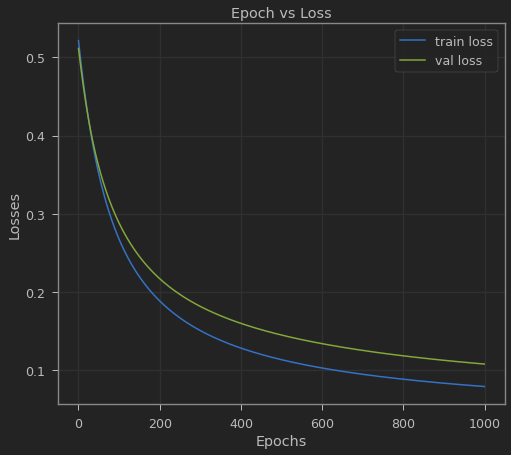

In [6]:
plt.plot(trainlosses, label="train loss")
plt.plot(vallosses, label="val loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

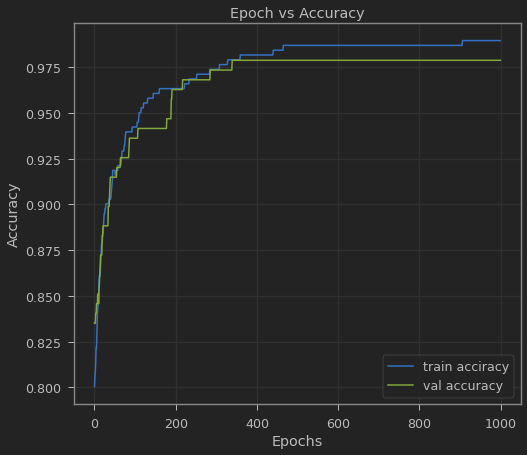

In [7]:
plt.plot(trainacc, label="train acciracy")
plt.plot(valacc, label="val accuracy")
plt.title("Epoch vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# Get accuracy of the model
trainpreds = model(inputs_train).detach().numpy()
valpreds = model(inputs_val).detach().numpy()

train_acc = np.mean(Ytrain == np.round(trainpreds))
val_acc = np.mean(Yval == np.round(valpreds))

print("Train accuracy : {:.4f}, Val accuracy : {:.4f}".format(train_acc * 100., val_acc * 100.))

Train accuracy : 98.9501, Val accuracy : 97.8723
